# Regresión Lineal
La regresión lineal es uno de los métodos mas antiguos de Aprendizaje Supervisado. La regresión lineal se basa en el principio subyacente que las variables independientes (predictores o features) se relacionan en forma lineal a efectos de generar el valor de la variable dependiente. Además de permitirnos predecir la variable independiente, también nos permite identificar cuales son las variables dependientes que mas impactan en el valor de la variable a predecir.

## Modelo subyacente

#### Modelo de regresión lineal simple (un predictor): 
\begin{equation*}
y = \theta_{0} + \theta_{1} \cdot x_{1} + e
\end{equation*}

Donde:

\begin{equation*}
\hat{y} = \theta_{0} + \theta_{1} \cdot x{1}
\end{equation*}

#### Modelo de regresión lineal múltiple (muchos predictores):
\begin{equation*}
y = \theta_{0} + \sum_{i=1}^{n}(\theta_{i} \cdot x_{i}) + e
\end{equation*}

Donde:

\begin{equation*}
\hat{y} = \theta_{0} + \sum_{i=1}^{n}(\theta_{i} \cdot x_{i}) 
\end{equation*}

- $\hat{y}$ es el valor predicho (la estimación de la variable independiente).
- n es el número de variables dependientes.
- xi es la ith variable dependiente.
- θj es el jth parámetro del modelo. Incluye el bias (sesgo o término independiente) y los coeficientes de todas las variables dependientes.
- e es el error (aleatorio) en la predicción.

Usualmente, en Machine Learning es mas usada la notación vectorial:
#### Equation y = hθ x = θT · x
- θ es el vector columna de parámetros del modelo. Incluye el bias (sesgo o término independiente) y los coeficientes de todas las variables dependientes. Por convenio, los vectores son siempre vectores columna, salvo que se aclare lo contrario.
- θT es el transpuesto del vector θ (o sea, un vector fila).
- x es el vector de variables independientes. Para poder multiplicarlo por θT, se agrega la componente inicial correspoendiente al bias (θ0), la cual vale siempre 1.
- θT · x es el producto escalar entre x y θT.
- y es el vector de prediciones. En el caso de predecir una sola variable, es un escalar.

Generemos nuestro primer ejemplo de regresion lineal simple. Importemos Numpy y generemos datos aleatorios para X:

In [15]:
import numpy as np

np.random.seed(19680801) # Fijo la semilla aleatoria, para reproducir el experimento
X = 2 * np.random.rand(100, 1)

Veamos el contenido de nuestra variable:

In [8]:
X

array([[ 1.40073461],
       [ 1.48550162],
       [ 1.41856002],
       [ 1.13349104],
       [ 1.95557067],
       [ 1.41266969],
       [ 0.49583152],
       [ 0.3157667 ],
       [ 1.39539704],
       [ 1.43991333],
       [ 0.51548886],
       [ 0.68309357],
       [ 1.93752234],
       [ 1.3890142 ],
       [ 0.93276652],
       [ 1.40562539],
       [ 1.02357175],
       [ 1.85748274],
       [ 1.4795386 ],
       [ 1.24487807],
       [ 1.30309094],
       [ 0.79361522],
       [ 1.08647879],
       [ 1.59979906],
       [ 1.44308945],
       [ 0.59072796],
       [ 0.32189176],
       [ 0.41225103],
       [ 0.26865077],
       [ 0.96121003],
       [ 0.68504363],
       [ 0.72593858],
       [ 1.94583528],
       [ 0.22188722],
       [ 0.77652818],
       [ 1.56613175],
       [ 1.94579452],
       [ 0.96641921],
       [ 0.67284221],
       [ 1.13483807],
       [ 0.09588302],
       [ 0.77787406],
       [ 1.81260729],
       [ 0.32203642],
       [ 1.48724227],
       [ 1

Esta visualización no es tan útil, hagamos un histograma con matplotlib:

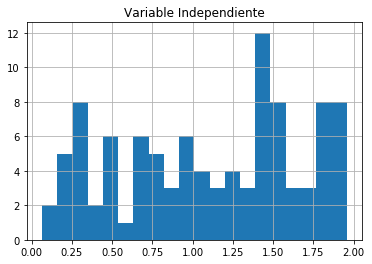

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

n_bins = 20
plt.title('Variable Independiente')
plt.hist(X, bins = n_bins)
plt.grid(True)
plt.show()
plt.clf()


Definamos y como una función lineal respecto de X pero con ruido aleatorio. Obviamente, en un ejemplo real no conocería la forma de y.

In [18]:
y = 4 + 3 * X + np.random.randn(100, 1)

Veamos como lucen los datos:

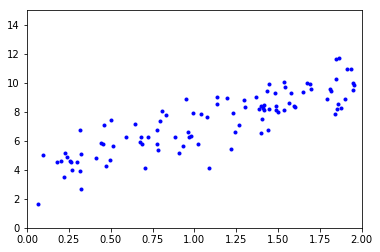

In [22]:
plt.plot(X, y, "b.") #"b." indica que grafique puntos sin unir mediente líneas
plt.axis([0, 2, 0, 15])
plt.show()

A simple vista se observa cierta dependencia. Pero supongamos que no sabemos como está definida "y" y tratemos de estimarla usando regresión lineal.
Primero, agreguemos a los datos el coefiente 1 para el término independiente:

In [23]:
X_b = np.c_[np.ones((100, 1)), X] 

Y ahora calculemos los valores de θ que minimizan el error en el ajuste:

In [26]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 3.80010237],
       [ 3.19082032]])

Listo, theta_best son los parámetros del modelo de regresión lineal que ajusté que minimizan el error (que lo definimos aleatoriamente). ¿Como uso theta_best para hacer una predicción?:

In [27]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.80010237],
       [ 10.18174301]])

Si lo grafico:

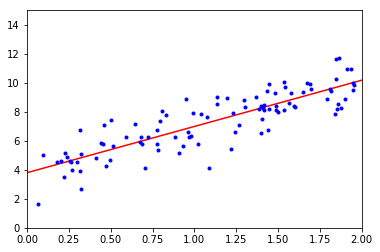

In [28]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Hacer el cálculo "manual" funciona bien, pero el paquete "Scikit-Learn" es una mejor alternativa:

In [34]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.80010237]), array([[ 3.19082032]]))

Ahora la predicción:

In [36]:
y_predict = lin_reg.predict(X_new)

In [37]:
y_predict

array([[  3.80010237],
       [ 10.18174301]])